<a href="https://colab.research.google.com/github/leandrolustosa/ia-supervised-learning/blob/master/trabalho_3_aprendizado_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento do Dataset

In [ ]:
# estrutura do CSV: age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
!wget -O heart-disease-uci.zip https://drive.google.com/uc?id=1IwnAyMCCXjX9NZvkXVm1nKZDkiafpE3P&export=download

!unzip -q -d data heart-disease-uci.zip

!ls

--2020-09-17 00:55:48--  https://drive.google.com/uc?id=1IwnAyMCCXjX9NZvkXVm1nKZDkiafpE3P
Resolving drive.google.com (drive.google.com)... 172.217.218.139, 172.217.218.100, 172.217.218.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.218.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/heidp14si1oli7nertuijtartduuho6k/1600304100000/10352870668252494528/*/1IwnAyMCCXjX9NZvkXVm1nKZDkiafpE3P [following]
--2020-09-17 00:55:48--  https://doc-0k-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/heidp14si1oli7nertuijtartduuho6k/1600304100000/10352870668252494528/*/1IwnAyMCCXjX9NZvkXVm1nKZDkiafpE3P
Resolving doc-0k-bg-docs.googleusercontent.com (doc-0k-bg-docs.googleusercontent.com)... 173.194.79.132, 2a00:1450:4013:c05::84
Connecting to doc-0k-bg-docs.googleusercontent.com (doc-0k-bg-docs.googleusercontent.com)|17

# Pré Processamento do Dataset

In [ ]:
!pip install sklearn

import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

data = pd.read_csv("/content/data/heart.csv")

target = data["target"]
features = data.drop(columns=["target"])

for column in features.columns:
  min = features[column].min()
  features[column] = features[column].apply(lambda x, min: x - min, min=min)

  max = features[column].max()
  features[column] = features[column].apply(lambda x, max: x / max, max=max)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print('Tamanho da base de treinamento {} registros'.format(len(y_train)))
print('Tamanho da base de teste {} registros'.format(len(y_test)))


In [ ]:
from tabulate import tabulate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

names = ["K-NN", "SVM", "Random Forest", "MLP", "Gradient Boosting", "XGBoost"]

classificadores = [KNeighborsClassifier(n_neighbors=5),
                   SVC(C=1, gamma=2.0),
                   RandomForestClassifier(max_depth=5, n_estimators=10),
                   MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=50000, batch_size=64, alpha=1e-1),
                   GradientBoostingClassifier(n_estimators=10),
                   xgb.XGBClassifier(random_state=1,learning_rate=0.01)]


# Métricas

Tamanho da base de teste 91 registros

 K-NN
+----+----------+------------+------------+----------+--------------------+-----------------+
|    | avg      | acurácia   | precisão   | recall   | treinamento (ms)   | predição (ms)   |
|----+----------+------------+------------+----------+--------------------+-----------------|
|  0 | -        | 0.780220   |            |          | 1.441717           | 4.726410        |
|  1 | micro    |            | 0.780220   | 0.780220 |                    |                 |
|  2 | macro    |            | 0.778343   | 0.780244 |                    |                 |
|  3 | weighted |            | 0.781721   | 0.780220 |                    |                 |
+----+----------+------------+------------+----------+--------------------+-----------------+

 SVM
+----+----------+------------+------------+----------+--------------------+-----------------+
|    | avg      | acurácia   | precisão   | recall   | treinamento (ms)   | predição (ms)   |
|----+---

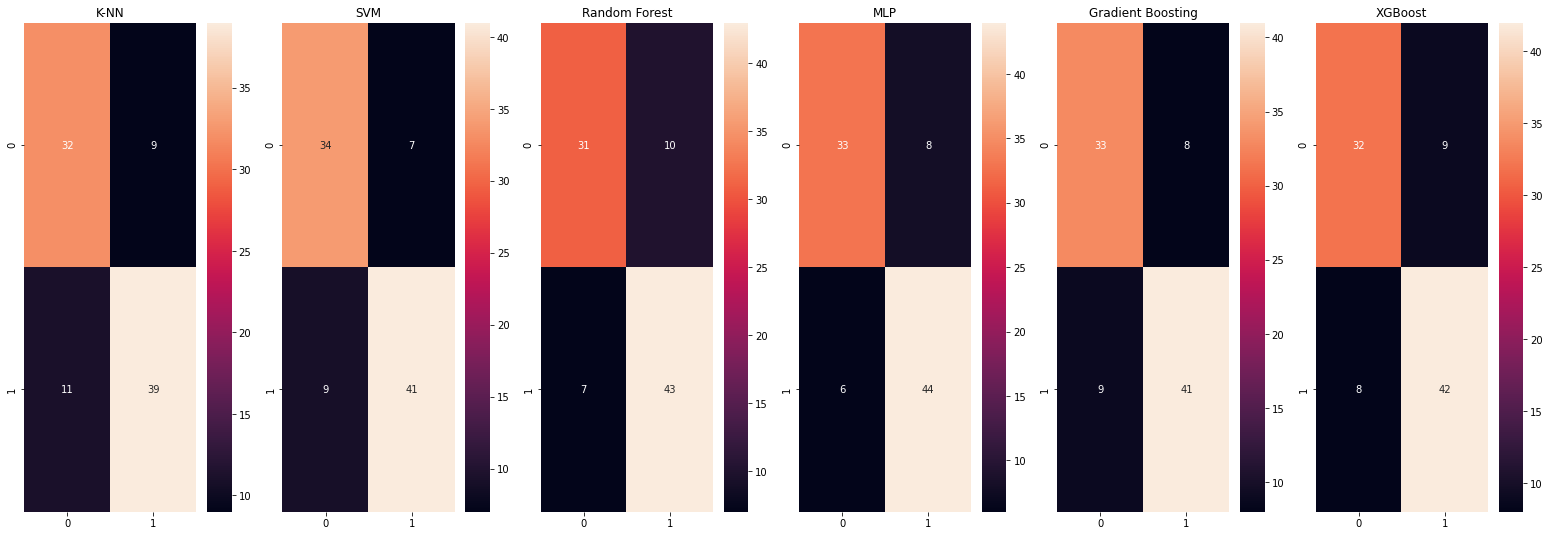

In [ ]:


f, axes = plt.subplots(1, 6, figsize=(27, 9), sharex=True)

for name, ax, classificador in zip(names, axes, classificadores):

  start = time.time()
  classificador.fit(X_train, y_train)
  stop = time.time()

  tempo_treinamento = stop - start

  start = time.time()
  y_pred = classificador.predict(X_test)
  stop = time.time()

  tempo_predicao = stop - start

  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)
  ax.set_title(name)

  d = { 'avg': ['-', 'micro', 'macro', 'weighted'],
       'acurácia': ['{:.6f}'.format(accuracy_score(y_test, y_pred)),'','',''],
       'precisão': ['',
                    '{:.6f}'.format(precision_score(y_test, y_pred, average='micro')),
                    '{:.6f}'.format(precision_score(y_test, y_pred, average='macro')),
                    '{:.6f}'.format(precision_score(y_test, y_pred, average='weighted'))],
       'recall': ['',
                  '{:.6f}'.format(recall_score(y_test, y_pred, average='micro')),
                  '{:.6f}'.format(recall_score(y_test, y_pred, average='macro')),
                  '{:.6f}'.format(recall_score(y_test, y_pred, average='weighted'))],
       'treinamento (ms)': ['{:.6f}'.format(tempo_treinamento * 1000),'','',''],
       'predição (ms)': ['{:.6f}'.format(tempo_predicao * 1000),'','',''] }

  df = pd.DataFrame(data=d)

  print('\n ' + name)
  print(tabulate(df, headers='keys', tablefmt='psql'))

# Conclusão

O classificador K-NN apesar de ser o mais rápido entre todos, em relação ao tempo total de treinamento, apresentou a pior acurácia na predição em relação a base de teste, o Gradient Boosting foi o mais rápido na predição, mas a sua acurácia é mediana. Em geral a melhor acurácia ficou dividida entre os classificadores MLP e SVM, no entanto o tempo de treinamento do MLP é o mais alto entre todos, levando mais de 1s no seu processo, tornando assim o SVM mais eficaz. As matrizes de confusão nos mostram um equilíbrio na identificação dos verdadeiros negativos e verdadeiros positivos.